<a href="https://colab.research.google.com/github/ArvidLev/MNIST-Kaggle/blob/main/MnistKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Kaggle
For this project I am trying to accurately predict the famous MNIST digit data set using CNN. The data can be found and downloaded at https://www.kaggle.com/c/digit-recognizer/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


# Loading the data

In [ ]:
training_images = pd.read_csv('train.csv')
testing_images = pd.read_csv('test.csv')

In [ ]:
training_labels = training_images.pop('label')

In [ ]:
training_images.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [ ]:
testing_images.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [ ]:
print(training_images.shape, '\n', testing_images.shape)

(42000, 784) 
 (28000, 784)


Split the data into a validation and train set

In [ ]:
train_images, validation_images, train_labels, validation_labels = train_test_split(training_images, training_labels, test_size = 0.4)
print('Training Images:', training_images.shape)
print('Train Images:', train_images.shape)
print('Testing Images:', testing_images.shape)
print('Validation Images:', validation_images.shape)

Training Images: (42000, 784)
Train Images: (25200, 784)
Testing Images: (28000, 784)
Validation Images: (16800, 784)


The data comes in row form but we want it to be in (len, 28, 28, 1) form in order use convolutions on it.

In [ ]:
training_images = training_images.to_numpy()
train_images = train_images.to_numpy()
train_labels = train_labels.to_numpy()
validation_images = validation_images.to_numpy()
validation_labels = validation_labels.to_numpy()
testing_images = testing_images.to_numpy()
training_labels = training_labels.to_numpy()
train_images = train_images.reshape(25200, 28, 28, 1)
validation_images = validation_images.reshape(16800, 28, 28, 1)
training_images = training_images.reshape(42000, 28, 28, 1)
testing_images = testing_images.reshape(28000, 28, 28, 1)
print(training_images.shape)
print(testing_images.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


# Augmentation and preprocessing
Here we are variations of the images that we have by zooming in and rotating the images. Also, we scale the images here.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.,
    horizontal_flip = False,
    rotation_range = 10,
    vertical_flip = False,
    zoom_range = 0.1,
    height_shift_range = 0.1,
    fill_mode = 'nearest'
)
validation_datagen = ImageDataGenerator(
    rescale = 1.0/255.
)

# Model
For the evaluation of the model we are only going to go for 5 epochs to save time. We should be able to get a good idea if the model works from this.

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu', padding = 'Same' ,input_shape = (28,28,1)),
                             tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu', padding = 'same'),
                             tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
                             tf.keras.layers.Dropout(0.25),

                             tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
                             tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
                             tf.keras.layers.Dropout(0.25),


                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(256, activation = 'relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(10, activation = 'softmax')
])
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer ='adam',
              metrics = ['accuracy'])
history = model.fit_generator(train_datagen.flow(train_images, train_labels, batch_size = 32),
                              epochs = 5,
                              steps_per_epoch = int(len(train_images)/32),
                              validation_data = validation_datagen.flow(validation_images, validation_labels, batch_size = 32))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
787/787 [==============================] - 47s 21ms/step - loss: 0.3765 - accuracy: 0.8790 - val_loss: 0.0756 - val_accuracy: 0.9768
Epoch 2/5
787/787 [==============================] - 16s 21ms/step - loss: 0.1393 - accuracy: 0.9578 - val_loss: 0.0509 - val_accuracy: 0.9835
Epoch 3/5
787/787 [==============================] - 16s 21ms/step - loss: 0.1046 - accuracy: 0.9679 - val_loss: 0.0384 - val_accuracy: 0.9885
Epoch 4/5
787/787 [==============================] - 17s 21ms/step - loss: 0.0875 - accuracy: 0.9745 - val_loss: 0.0371 - val_accuracy: 0.9883
Epoch 5/5
787/787 [==============================] - 17s 21ms/step - loss: 0.0716 - accuracy: 0.9794 - val_loss: 0.0355 - val_accuracy: 0.9899


# Model Evaluation
Lets plot the loss and accuracy plot for the training and validation set.

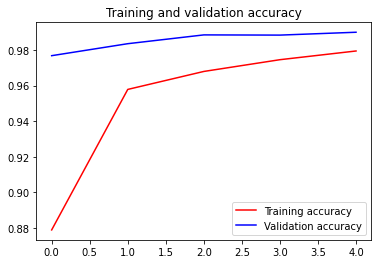

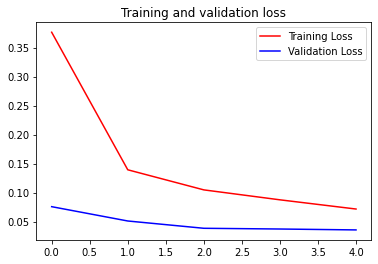

In [ ]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Final fit
Now we fit the whole training set and we go for 30 epochs.

In [ ]:
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size = 32),
                              epochs = 30,
                              steps_per_epoch = int(len(training_images)/32)
                              )

Epoch 1/30
   4/1312 [..............................] - ETA: 25s - loss: 0.0784 - accuracy: 0.9844

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1312/1312 [==============================] - 23s 18ms/step - loss: 0.0695 - accuracy: 0.9802
Epoch 2/30
1312/1312 [==============================] - 24s 18ms/step - loss: 0.0585 - accuracy: 0.9834
Epoch 3/30
1312/1312 [==============================] - 23s 18ms/step - loss: 0.0565 - accuracy: 0.9833
Epoch 4/30
1312/1312 [==============================] - 24s 18ms/step - loss: 0.0505 - accuracy: 0.9850
Epoch 5/30
1312/1312 [==============================] - 24s 18ms/step - loss: 0.0486 - accuracy: 0.9855
Epoch 6/30
1312/1312 [==============================] - 24s 18ms/step - loss: 0.0448 - accuracy: 0.9870
Epoch 7/30
1312/1312 [==============================] - 24s 18ms/step - loss: 0.0417 - accuracy: 0.9876
Epoch 8/30
1312/1312 [==============================] - 24s 18ms/step - loss: 0.0456 - accuracy: 0.9868
Epoch 9/30
1312/1312 [==============================] - 24s 18ms/step - loss: 0.0431 - accuracy: 0.9871
Epoch 10/30
1312/1312 [==============================] - 23s 18ms/step - lo

# Predictions

In [ ]:
predictions = model.predict(testing_images)
predictions

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
predictions = np.argmax(predictions,axis = 1)

predictions = pd.Series(predictions,name="Label")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictions],axis = 1)

submission.to_csv("cnn_mnist_datagen2.csv",index=False)

This got a 0.97878 score on the kaggle competition.